# SÉRIES TEMPORAIS - CONSUMO DE ENERGIA ELÉTRICA.

## Alunos: José Messias Marinho, Vladimir Yuri.

## Etapa 1: Importação das bibliotecas

In [306]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodels-0.11.0:
      Successfully uninstalled statsmodels-0.11.0


In [307]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from google.colab import drive

## Etapa 2: Carregamento da base de dados

In [308]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Importando o dataframe de consumo de energia elétrica

In [309]:
# Conversão de um tipo object para um tipo datatime.
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
dataset = pd.read_csv('/content/drive/My Drive/DATAS/Electric_Production.csv', parse_dates = ['DATE'], index_col = 'DATE', date_parser = dateparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


> Convertendo a coluna "DATE" para um tipo *datetime* e trazendo ela para o index do dataframe deixando assim apenas as colunas que são realmente importantes para a análise.

In [310]:
dataset.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


> Criando a nossa variável *time_series* que vai receber os valores do nosso dataframe

In [311]:
time_series = dataset['Value']

## Etapa 3: Exploração da série temporal

> Pode-se perceber que há um aumento na produção de energia elétrica no decorrer dos anos, junto assim com um padrão de oscilações

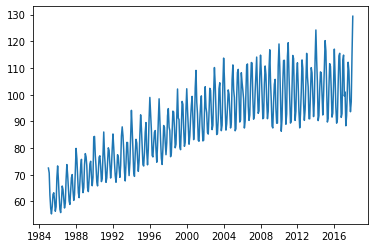

In [312]:
#Plotar o gráfico
plt.plot(dataset.index, dataset.Value);

In [313]:
time_series[0]

72.5052

In [314]:
time_series['2000-03-01']

88.0927

In [315]:
time_series['2000-05-01':'2001-05-01']

DATE
2000-05-01     84.4552
2000-06-01     91.0406
2000-07-01     95.9957
2000-08-01     99.3704
2000-09-01     90.9178
2000-10-01     83.1408
2000-11-01     88.0410
2000-12-01    102.4558
2001-01-01    109.1081
2001-02-01     97.1717
2001-03-01     92.8283
2001-04-01     82.9150
2001-05-01     82.5465
Name: Value, dtype: float64

In [316]:
time_series[:'2000-01-01']

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
1999-09-01     87.2248
1999-10-01     80.6409
1999-11-01     82.2025
1999-12-01     94.5113
2000-01-01    102.2301
Name: Value, Length: 181, dtype: float64

In [317]:
time_series['2006']

DATE
2006-01-01    104.4724
2006-02-01    101.5196
2006-03-01     98.4017
2006-04-01     87.5093
2006-05-01     90.0222
2006-06-01    100.5244
2006-07-01    110.9503
2006-08-01    111.5192
2006-09-01     95.7632
2006-10-01     90.3738
2006-11-01     92.3566
2006-12-01    103.0660
Name: Value, dtype: float64

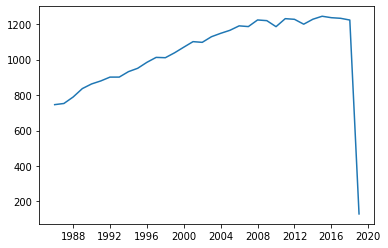

In [318]:
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

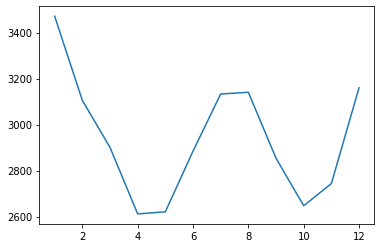

In [319]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

## Etapa 4: Decomposição da série temporal

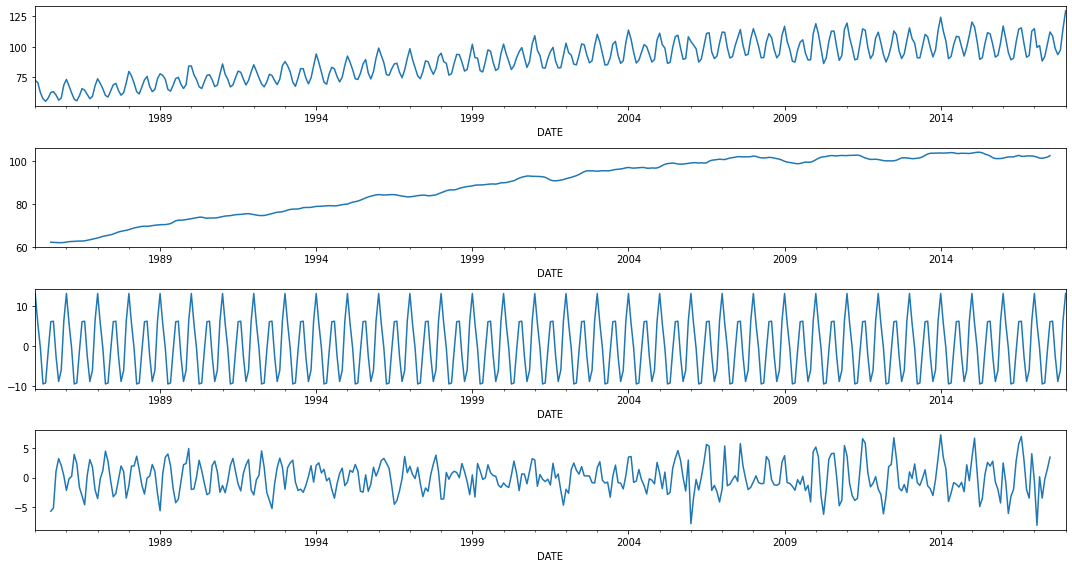

In [320]:
decomposicao = seasonal_decompose(time_series, period=12)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))

decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)

plt.tight_layout()

> Os plots que foram gerados, são respectivamente:

*   Observação original
*   Tendência
*   Sazonalidade
*   Residual





## Etapa 5: Verificação de Estacionariedade 

> COMO VERIFICAR SE UMA SÉRIE É ESTACIONÁRIA?

> Algumas das maneiras possíveis:



*   **Vizualizar os plots dos gráficos:** Em alguns dos casos, já é possível identificar visualmente a estacionariedade da série.

*   **Resumos estatísticos da série:** Pode-se verificar um resumo com as principais informações estatisticas da série e verificar se nela há estacionariedade.

*   **Testes estatísticos:** Sempre baseados em métodos científicos, são testes que tem a capacidade de nos dizer se uma série é estacionária ou não.




### Etapa 5.1: Teste ADF

> Para provar se a série é estacionária ou não, iremos usar ***ADF (Augmented Dickey-Fuller) Test***

In [321]:
result = adfuller(time_series)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('p-value: {:.4f}'.format(result[1]))

Dickey-Fuller Aumentado
Teste Estatístico: -2.2570
p-value: 0.1862


* Quanto menor o p-value, mais evidências contra a hipótese nula você tem. Por exemplo, caso seja usado p-value=0.05, rejeitamos a H0 com um nível de confiança de 95%

* Podemos perceber que não é uma série estacionária, pois o p-value é superior a 0.05

### Etapa 5.2: Transformação em uma série estacionária:

> Para que haja a transformação em uma série estacionária, um bom começo é aplicar log para eliminar magnitude dos valores da série e subtrair a média móvel.

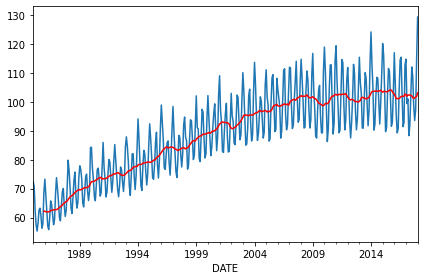

In [322]:
ma = dataset.rolling(12).mean()

fig, ax = plt.subplots()
dataset.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

* Fazendo log e plotando o dataframe:

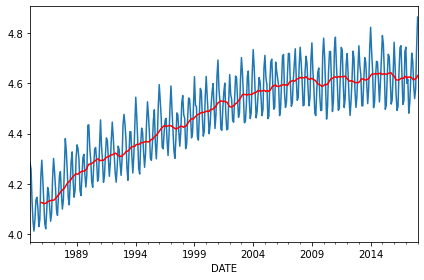

In [323]:
dataset_log = np.log(dataset)
ma_log = dataset_log.rolling(12).mean()

fig, ax = plt.subplots()
dataset_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

* Percebendo que o eixo Y mudou os valores, agora só subtrair a méida móvel e retirar os valores nulos  ***.dropna()*** e calcular o desvio padrão ***std()***

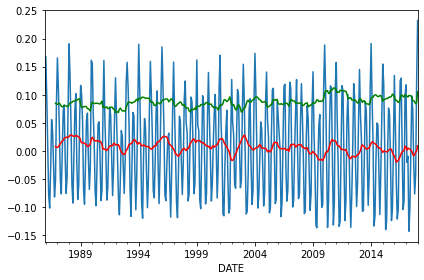

In [324]:
# Subtraindo média do log dos dados, a média em 12 pois será anualmente
dataset_sub = (dataset_log - ma_log).dropna()
ma_sub = dataset_sub.rolling(12).mean()
# Desvio Padrão
std_sub = dataset_sub.rolling(12).std()

fig, ax = plt.subplots()
dataset_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=False, color='r')
std_sub.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

* Visualmente já podemos ver que ela se transformou em uma série estacionária, iremos fazer o teste ADF novamente para provar que ela se transformou em uma **série estacionária**.


In [325]:
# Repetindo o ADF
X_sub = dataset_sub.Value.values

# aplicar ADF e imprimir o resultado
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -5.2116
Valor-p: 0.0000083256
Valores Críticos:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709


* Aqui podemos percerber que o seu p-value está quase zero, abaixo de 0.05. Porém, podemos transformar a nossa série mais estacionária ainda utilizando diferenciação, aplicaremos a técnica e iremos refazer o teste ADF e vamos analisar o gráfico

Dickey-Fuller Aumentado
Teste Estatístico: -7.6511
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709


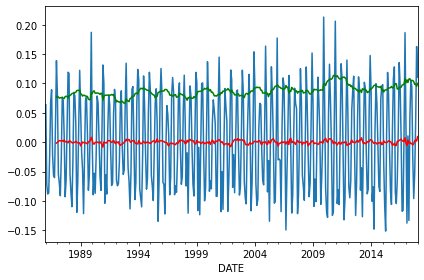

In [326]:
# Diferenciação
dataset_diff = dataset_sub.diff(1)
ma_diff = dataset_diff.rolling(12).mean()

# Desvio padrão
std_diff = dataset_diff.rolling(12).std()

# Plotar a diferenciação
fig, ax = plt.subplots()
dataset_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

# Extrair apenas os valores e retirar os valores NA
X = dataset_diff.Value.dropna().values

# Aplicar ADF e imprimir o resultado
result_diff = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

* Depois da diferenciação, agora o nosso p-value foi zerado. Agora que a série está totalmente estacionária, iremos aplicar as técnicas de forecasting usando ***ARIMA***.

## Etapa 6: Forecasting usando ARIMA

* ***ARIMA***  -->  Significa AutoRegressive Integrated Moving Average, é é um dos modelos mais famoso e mais utilizados para fazer previsões em cima de séries temporais.

* É muito comum ver a notação ARIMA(p,d,q). E cada um desses componentes são representados por um parâmetro do modelo, e utilizando as funções ***ACF (Autocorrelação*** e ***PACF (Autocorrelação Parcial)***. 

### Etapa 6.1: Autocorrelação e Autocorrelação Parcial

In [327]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataset_diff.dropna(), nlags=25)
lag_pacf = pacf(dataset_diff.dropna(), nlags=25)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  fft=True,


> Plotando os gráficos para ACF e PACF e plotar os limites cíticos. A formula 1.96 / √(N−d), N é o número de pontos do dataframe e d é o número de vezes que diferenciamos os dados.

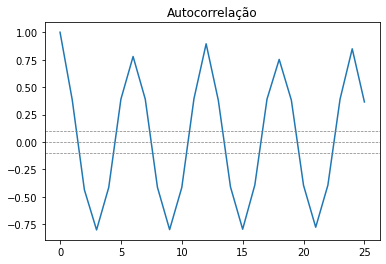

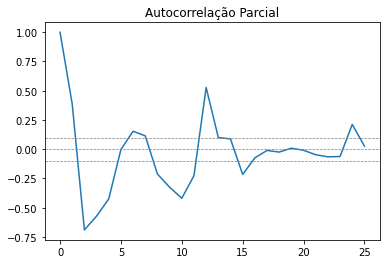

In [328]:
# Plotar ACF e PACF

plt.plot(lag_acf)
plt.axhline(y=-1.96 / (np.sqrt((len(dataset_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(dataset_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=-1.96 / (np.sqrt((len(dataset_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(dataset_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

* Conseguimos então ver os valores dos parâmetros do ARIMA nos plots acima.

* q: valor onde a ACF (primeiro plot) cruza o limite superior do intervalo pela primeira vez, neste caso seria o 2 do eixo X.

* p: valor onde o PACF (segundo plot) cruza o limite superior do intervalo pela primeira vez, neste caso seria também o 2 do eixo X

* Com os nossos valores de p,d e q, iremos construir um modelo ***ARIMA*** e colocar um **order=(2,1,2)**.

### Etapa 6.2: Treinando o modelo ARIMA

In [329]:
!pip install statsmodels==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.11.0-cp37-cp37m-manylinux1_x86_64.whl (8.7 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.1 requires statsmodels>=0.13.2, but you have statsmodels 0.11.0 which is incompatible.
plotnine 0.8.0 requires statsmodels>=0.12.1, but you have statsmodels 0.11.0 which is incompatible.


In [330]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dataset_log, order=(2,1,2))
result_AR = model.fit(disp = -1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


> Com o nosso modelo ***ARIMA*** já treinado, iniciando no mês de fevereiro de 2016 e finalizar em março de 2019, iremos plotar a previsão em relação a essas datas anteriores.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


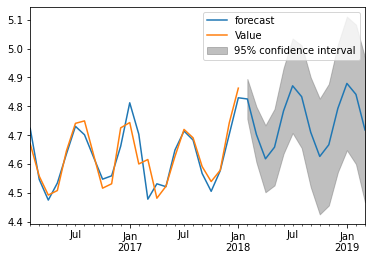

In [331]:
result_AR.plot_predict(start="2016-02-01", end="2019-03-01");

## Etapa 7: Gráfico das previsões utilizando auto_arima

In [332]:
from pmdarima.arima import auto_arima

### Etapa 7.1: Separando os dados em teste e treino

In [333]:
len(dataset_sub)

386

In [334]:
train = dataset_sub[:286]
train.shape

(286, 1)

In [335]:
train.index.min(), train.index.max()

(Timestamp('1985-12-01 00:00:00'), Timestamp('2009-09-01 00:00:00'))

In [336]:
test = dataset_sub[286:]
test.shape

(100, 1)

In [337]:
test.index.min(), test.index.max()

(Timestamp('2009-10-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

### Etapa 7.3: Treinando o modelo

In [338]:
model2 = auto_arima(train, suppress_warnings=True)

### Etapa 7.4: Calculando e plotando o gráfico das previsões

In [340]:
prediction = pd.DataFrame(model2.predict(n_periods=100), index=test.index)
prediction.columns = ['predictions']
prediction

,predictions
DATE,
2009-10-01,-0.118871
2009-11-01,-0.085181
2009-12-01,0.021627
2010-01-01,0.106581
2010-02-01,0.084835
...,...
2017-09-01,-0.021742
2017-10-01,-0.096589
2017-11-01,-0.074745


In [341]:
test

,Value
DATE,
2009-10-01,-0.100279
2009-11-01,-0.095551
2009-12-01,0.117520
2010-01-01,0.188556
2010-02-01,0.109866
...,...
2017-09-01,-0.022477
2017-10-01,-0.076443
2017-11-01,-0.041347


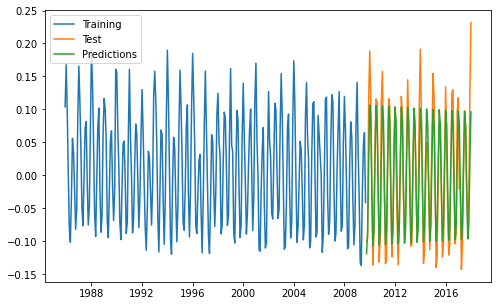

In [342]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();

## Referências

- https://maxwellpaparelli.medium.com/time-series-s%C3%A9ries-temporais-com-python-f4e74fd45b0b